# Árboles de decisión: Comparación de árboles de regresión con regresión lineal

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import Lasso

### Generar un dataset sintético

In [2]:
X, Y, theta = make_regression(n_samples=1000, n_features=19, n_targets=1, bias=1, noise=0.5, shuffle=True, coef=True, random_state=42)

### Preprocesar los datos

In [3]:
# TODO: Reordena los datos aleatoriamente
X_reord, Y_reord = shuffle(X,Y,random_state=42)

# TODO: Normaliza los ejemplos
scaler = preprocessing.StandardScaler().fit(X_reord)
X_escalada = scaler.transform(X_reord)

# TODO: Divide el dataset en subset de entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X_escalada,Y_reord,train_size = 0.8, test_size = 0.2, random_state=42)

### Optimizar los modelos por validación cruzada

In [4]:
# TODO: Entrena un modelo diferente para cada valor de *max_depth* considerado sobre un fold diferente

# Valores de max_depth a considerar
max_depths = list(range(1,8))
print('Profundidades máx. a considerar:')
print(max_depths)

alphas = np.random.random(8)
val_min=0
val_max=1e-3
alphas = (alphas*(val_max-val_min)+val_min)
print(alphas)

# Crea x splits de K-fold, uno por cada valor de max_depth a considerar
kf = KFold(n_splits=7)
linear_models = []
decision_tree_models = []
lista_linear_scores = []
lista_tree_scores = []
best_model = None
i=0

for train, cv in kf.split(X): #KFOLDS
    X_train1, X_test1 = X[train], X[cv]
    Y_train1, Y_test1 = Y[train], Y[cv]
    
    #Modelo de lasso
    linear_model = Lasso(alpha=alphas[i])
    linear_model = linear_model.fit(X_train, Y_train)
    linear_models.append(linear_model)
    linear_y_pred = linear_model.predict(X_test)
    linear_score = r2_score(Y_test,linear_y_pred)
    lista_linear_scores.append(linear_score)
    #print(linear_score)
    
    #Modelo de árbol
    tree_model = DecisionTreeRegressor(max_depth=max_depths[i])
    tree_model = tree_model.fit(X_train, Y_train)
    decision_tree_models.append(tree_model)
    tree_y_pred = tree_model.predict(X_test)
    tree_score = r2_score(Y_test,tree_y_pred)
    lista_tree_scores.append(tree_score)
    #print(tree_score)
    print('Profundidad máx. usada:', max_depths[i])
    
    # Si el modelo es mejor que el mejor modelo hasta ahora...
    if i==0:
        mejor_lasso = linear_model
        mejor_tree = tree_model
        best_depth_lasso = max_depths[i]
        best_depth_tree = max_depths[i]
        best_score_lasso = linear_score
        best_score_tree = tree_score
    elif i>0: 
        if linear_score > best_score_lasso: 
            mejor_lasso = linear_model
            best_depth_lasso = max_depths[i]
            best_score_lasso = linear_score
        print('Profundidad máx. del mejor modelo de lasso hasta ahora:', best_depth_lasso)
        if tree_score > best_score_tree: 
            mejor_tree = tree_model
            best_depth_tree = max_depths[i]
            best_score_tree = tree_score
        print('Profundidad máx. del mejor modelo de árbol hasta ahora:', best_depth_tree)
    i+=1

Profundidades máx. a considerar:
[1, 2, 3, 4, 5, 6, 7]
[1.50646998e-04 9.63140430e-04 1.76442713e-04 7.84959604e-04
 8.16612354e-04 1.12188573e-05 3.78729719e-04 7.81557043e-04]
Profundidad máx. usada: 1
Profundidad máx. usada: 2
Profundidad máx. del mejor modelo de lasso hasta ahora: 2
Profundidad máx. del mejor modelo de árbol hasta ahora: 2
Profundidad máx. usada: 3
Profundidad máx. del mejor modelo de lasso hasta ahora: 2
Profundidad máx. del mejor modelo de árbol hasta ahora: 3
Profundidad máx. usada: 4
Profundidad máx. del mejor modelo de lasso hasta ahora: 2
Profundidad máx. del mejor modelo de árbol hasta ahora: 4
Profundidad máx. usada: 5
Profundidad máx. del mejor modelo de lasso hasta ahora: 2
Profundidad máx. del mejor modelo de árbol hasta ahora: 5
Profundidad máx. usada: 6
Profundidad máx. del mejor modelo de lasso hasta ahora: 2
Profundidad máx. del mejor modelo de árbol hasta ahora: 5
Profundidad máx. usada: 7
Profundidad máx. del mejor modelo de lasso hasta ahora: 2
Pr

### Evaluar el modelo sobre el subset de test

In [5]:
# TODO: Evalúa el modelo con MSE y R^2 sobre el subset de test para mejor árbol y Lasso

y_train_test_lasso = mejor_lasso.predict(X_test)
mse = mean_squared_error(Y_test, y_train_test_lasso)
r2s = r2_score(Y_test, y_train_test_lasso)
print("Lasso")
print('Error cuadrático medio: %.2f', mse)
print('Coeficiente de determinación: %.2f', r2s)

y_train_test_tree = mejor_tree.predict(X_test)
mse = mean_squared_error(Y_test, y_train_test_tree)
r2s = r2_score(Y_test,y_train_test_tree)
print("Árbol de decisión")
print('Error cuadrático medio: %.2f', mse)
print('Coeficiente de determinación: %.2f', r2s)

Lasso
Error cuadrático medio: %.2f 0.24312653709456203
Coeficiente de determinación: %.2f 0.9999918574151807
Árbol de decisión
Error cuadrático medio: %.2f 18879.71704201391
Coeficiente de determinación: %.2f 0.3676967589930985


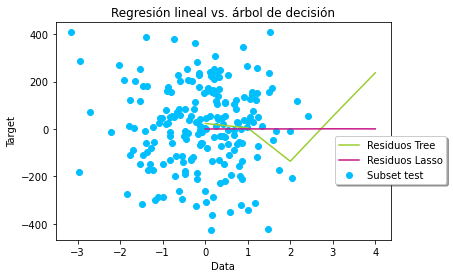

In [6]:
# TODO: Representa gráficamente los residuos de ambos modelos

residuos_tree = y_train_test_tree - Y_test
residuos_lasso = y_train_test_lasso - Y_test

plt.figure(3)

plt.title("Regresión lineal vs. árbol de decisión")
plt.xlabel("Data")
plt.ylabel("Target")

# Representa en un gráfico de puntos el subset de test
plt.scatter(X_test[:,0],Y_test, label="Subset test", color="deepskyblue")

plt.plot(residuos_tree[:5], label="Residuos Tree", color="yellowgreen")
plt.plot(residuos_lasso[:5], label = "Residuos Lasso", color ="mediumvioletred")

legend = plt.legend(loc='upper center', shadow = True, fontsize = 'medium', bbox_to_anchor=(1,0.5))

plt.show()

¿Hay diferencias significativas entre ambos modelos? ¿Qué ocurre si variamos el error o el nº de características del dataset original, cómo responden ambos tipos de modelos?

En el modelo de lasso, el error cuadrático medio y su coeficiente de determinación tienden a disminuir cuando tenemos más características. 

En cuanto al modelo de árbol de decisión tanto su coeficiente de determinación tiende a aumentar mientras que su coeficiente de determinación tiende a disminuir cuando hay más características.

### Bonus: Optimización de todos los hiper-parámetros del árbol de decisión

In [34]:
kf = KFold(shuffle=True, n_splits=7, random_state=0)
model = DecisionTreeRegressor()
params = {"splitter":["best","random"], 
          "max_depth" : [3,5,7,9,11,12,14],
         }

grid = GridSearchCV(model,param_grid = params, 
                   scoring=['r2', 'neg_mean_squared_error'],
                   refit='neg_mean_squared_error',
                    verbose=1, cv = kf)

grid=grid.fit(X_train,Y_train)

#Escogemos el mejor modelo
best_model = grid.best_params_
#print(grid.get_params().keys())

print(best_model)

Fitting 7 folds for each of 14 candidates, totalling 98 fits
{'max_depth': 5, 'splitter': 'best'}
